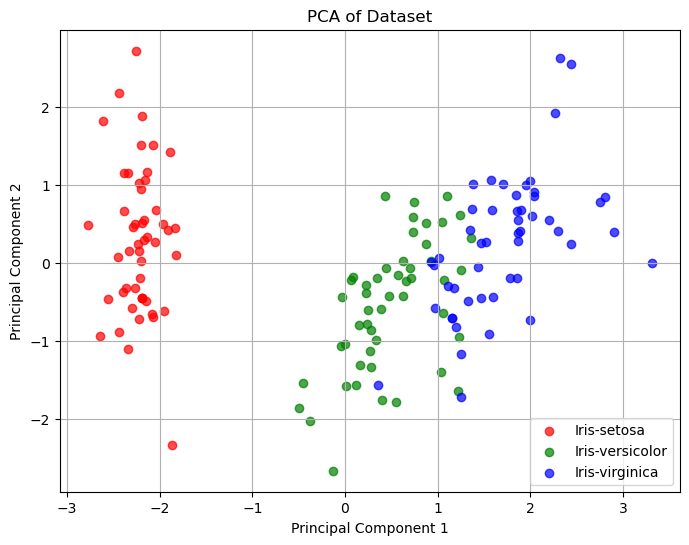

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset from a CSV file
file_path = 'IRIS.csv'  # Change this to your dataset file path
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Adjust colors based on dataset classes
unique_classes = np.unique(y)

for i, class_label in enumerate(unique_classes):
    plt.scatter(X_pca[y == class_label, 0], X_pca[y == class_label, 1], alpha=0.7, label=str(class_label), color=colors[i % len(colors)])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend()
plt.grid()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB
Dataset Information:
None


C:\Users\Jayesh\AppData\Local\Temp\ipykernel_19080\3368762886.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


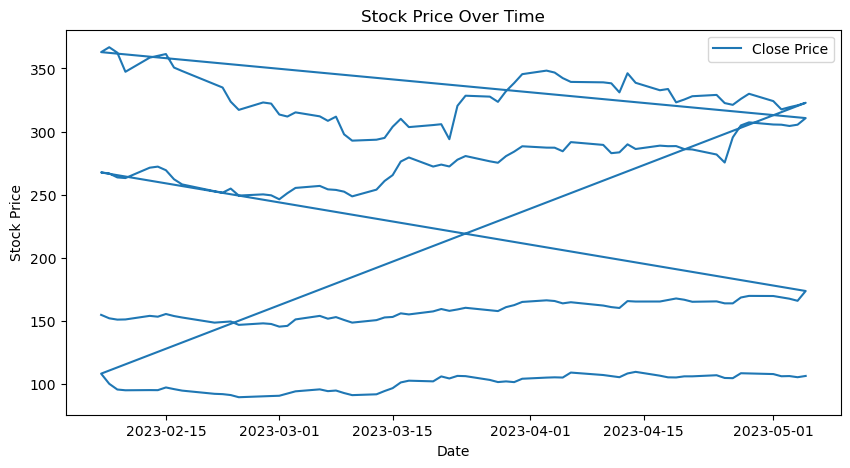

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A d

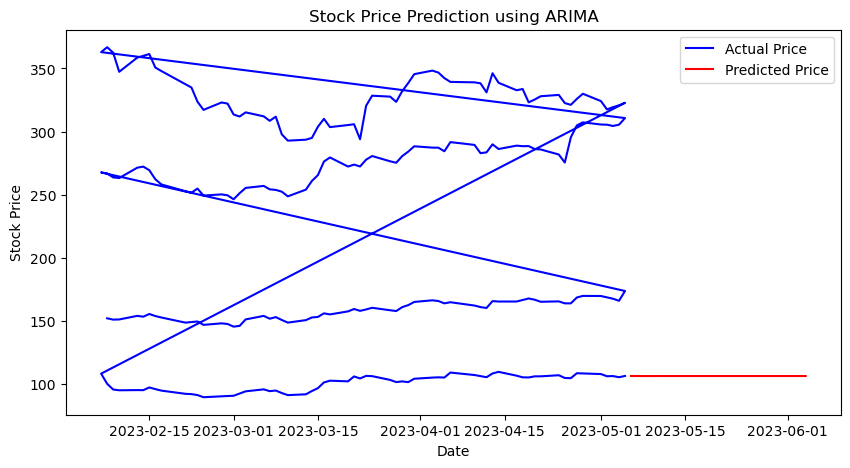

MAE: 1.5449807456669964
RMSE: 2.057766654780636


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset from a CSV file
file_path = 'stocks.csv'  # Change this to your dataset file path
df = pd.read_csv(file_path)

# Display dataset information
dataset_info = df.info()
print("Dataset Information:")
print(dataset_info)

# Convert Date column to DateTime format with explicit format handling
date_formats = ["%d-%m-%Y", "%Y-%m-%d", "%m/%d/%Y"]
for fmt in date_formats:
    try:
        df['Date'] = pd.to_datetime(df['Date'], format=fmt)
        break
    except ValueError:
        continue
else:
    raise ValueError("Date format not recognized. Please check your dataset.")

df.set_index('Date', inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Plot Close price time series
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

# Feature Engineering: Create lag features
df['Close_Lag1'] = df['Close'].shift(1)
df.dropna(inplace=True)

# Train ARIMA model
model = ARIMA(df['Close'], order=(5,1,0))  # Adjust p, d, q parameters as needed
model_fit = model.fit()

# Forecast stock prices
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast vs actual prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Actual Price', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using ARIMA')
plt.legend()
plt.show()

# Model Evaluation
mae = mean_absolute_error(df['Close'].iloc[-forecast_steps:], forecast[:forecast_steps])
rmse = mean_squared_error(df['Close'].iloc[-forecast_steps:], forecast[:forecast_steps], squared=False)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
